In [28]:
import numpy as np
import matplotlib.pyplot as plt

### Concentration unit : molecules/cm^3
### Reaction constant unit: 1/s

In [29]:
def KMC2(Ca0,Cb0,Cc0,k1,k2):
    
    MN = [100,1000,4000] # Molecule Number
    
    for N in MN:       
    
        CT = Ca0+Cb0+Cc0
    
        Na = N*Ca0/CT    
        Nb = N*Cb0/CT         # Calculate intial molecules for a,b,c
        Nc = N*Cc0/CT
        Vol = N/CT    
    
        k = np.array([k1,k2,0])
    
        Nj = np.array([Na,Nb,Nc])          # Here is matrix of a,b,c molecuels, it is for later calculation
        C = np.array([Ca0,Cb0,Cc0])   # Here is matrix of each concentration
        CC = np.array([Ca0,Cb0,Cc0])       # For saving data from loop
                                            
        t = 0                      # Establish time matrix T and intial time parameter 
        T = np.array([0])
                                             
        V = np.array([[-1,0],[1,-1],[0,1]])  # Stoichiometric V
        np.random.seed(260) 

        Ca = C[0]       # Define "Ca" and "Cb" for "while" command 
        Cb = C[1]
    
        while Ca>=0 and Cb>=0:
            
        
            r = k*C
            Rt = r[0]+r[1]
            P1 = np.random.rand()      # Generate random number between(0,1)
            tau = -1*np.log(P1)/Rt     # Calculate time interval
            t = t+tau                  # t(1) = t(0)+tau
            P2= np.random.rand()
            a = r[0]/Rt
    
            if P2 < a:
                Nj = Nj+V[:,0]
            else:
                Nj = Nj+V[:,1]
    
            C = Nj/Vol       # Because we get a new "Nj" so we need to calculate new concentration for each component.
            CC =np.c_[CC,C]  # Then we add this new concentration matrix "C" to our CC matrix by colume, refer to line 28
            Ca = C[0]        # Define "Ca" and "Cb" again because we have a new "C" matrix
            Cb = C[1] 
            T =np.r_[T,[t]]  # Add t(1) to T matrix, refer to line 43

        xx = np.transpose(CC)
        plt.plot(T,xx)
        plt.xlabel("Time",fontsize=20)
        plt.ylabel("C",fontsize=20)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        #plt.xlim(0,100)             
        plt.ylim(0,Ca0)
        plt.show()
    return plt.show()

C:\Users\Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars


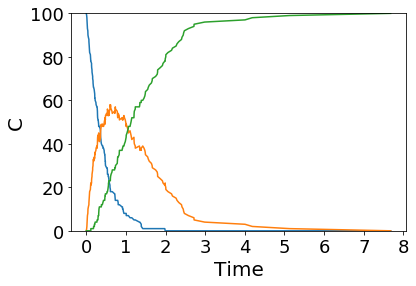

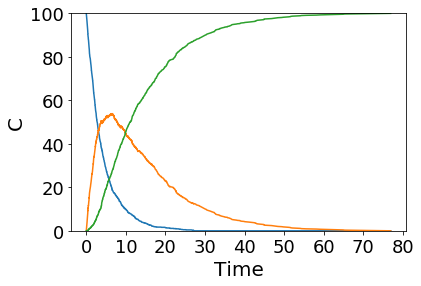

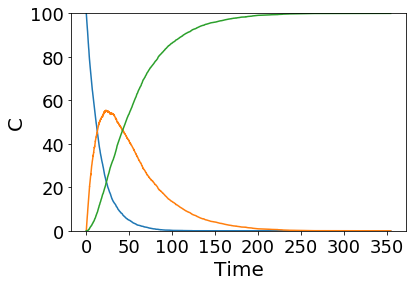

In [32]:
test2 = KMC2(100,0,0,2.5,1.0)

In [26]:
def Ana(InA,k1,k2): # InA: initial concentration A
    tt = np.arange(0,10,0.1)
    CA = InA*np.exp(-k1*tt)  #  You are using Ca as a scalar and a vector in the same code; Dangerous!
    CB = (k1*InA/(k2-k1))*(np.exp(-k1*tt)-np.exp(-k2*tt))
    CC = InA - CA - CB
    plt.plot(tt,CA)
    plt.plot(tt,CB)
    plt.plot(tt,CC)
    plt.show()  
    return plt.show()

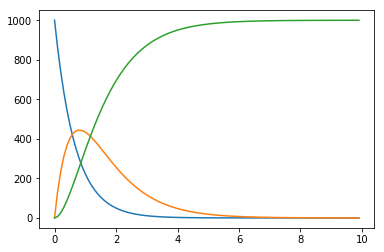

In [31]:
test2anal = Ana(1000,1.5,1.0)